TWITTER SENTIMENT ANALYSIS PROJECT

loading the files and doing the data preprocessing and importing various libraries needed


In [76]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

NOW WE NEED TO SPLIT THE DATASET BUT BEFORE THAT WE NEED TO REMOVE THE 

In [77]:
train  = pd.read_csv('twitter_train_data.csv')
test = pd.read_csv('twitter_test_data.csv')

### removing twitter hanmdles(@user) from dataset


In [5]:
combi = train.append(test, ignore_index=True)

NameError: name 'train' is not defined

In [4]:
# Combine datasets
combi = train.append(test, ignore_index=True)

# Function to remove @user handles
def remove_pattern(input_txt, pattern):
    if isinstance(input_txt, str):  # Make sure input is a string
        r = re.findall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
    return input_txt

# Apply the function to the tweet column
train['tidy_tweet'] = combi['tweet'].apply(lambda x: remove_pattern(x, r"@[\w]+"))


NameError: name 'train' is not defined

In [79]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_14556\1608074803.py:2: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
C:\Users\HP\AppData\Local\Temp\ipykernel_14556\1608074803.py:2: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


NameError: name 'combi' is not defined

In [29]:
#here i have encode the values in label column a number according to the value 
#it contains as ml algorithms works on numbers
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['label'] = le.fit_transform(train['sentiment'])

In [30]:
#spliting the dataset in 80/20 so that we can use 20% to test the models accuracy
from sklearn.model_selection import train_test_split

x=train['cleaned_text']
y=train['label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#tokenized every row of the file so the processing can be done
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet=train['cleaned_text'].apply(lambda x:x.split())
tokenized_tweet.head()

0     [im, get, borderland, murder]
1              [come, border, kill]
2       [im, get, borderland, kill]
3    [im, come, borderland, murder]
4     [im, get, borderland, murder]
Name: cleaned_text, dtype: object

In [32]:
#stiched the tokenized words back into the train dataframe

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['cleaned_text'] = tokenized_tweet

In [33]:
#installing wordcloud directly from the jupyter lab
!pip install wordcloud

In [34]:
train.head(5)

,id,game,sentiment,text,cleaned_text,label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder,3
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill,3
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill,3
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder,3
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder,3


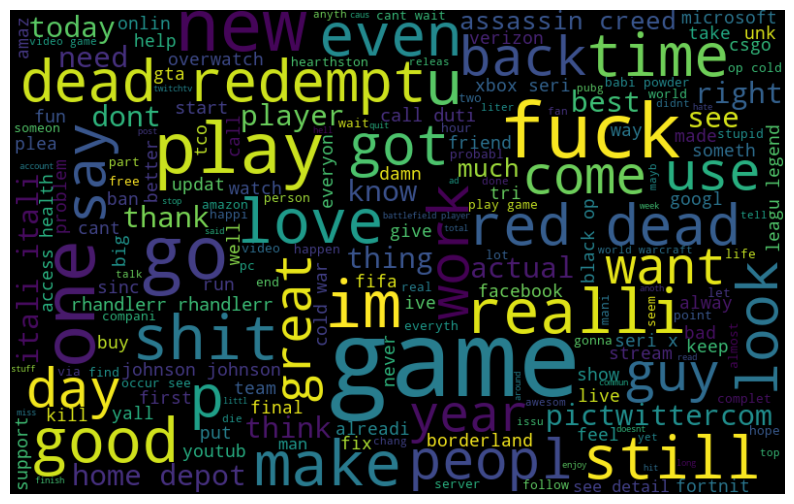

In [35]:
#now i will create a wordcloud of what words are present in datasets and how much, the words size relates to its frequency
all_words = ''.join([text for text in train['cleaned_text']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500 ,random_state=21 ,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis('off')
plt.show()


In [42]:
#checking positive words in datasets
train[train['label']==1].head(10)

,id,game,sentiment,text,cleaned_text,label
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,biggest dissappoin life came year ago fuck bor...,1
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,biggest disappoint life came year ago,1
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,biggest disappoint life came year ago,1
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...,biggest dissappoin life come year ago fuck bor...,1
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,biggest male dissappoin life came hang year ti...,1
29,2405,Borderlands,Negative,the biggest dissappoinment in my life came bac...,biggest dissappoin life came back last year ag...,1
36,2407,Borderlands,Negative,Man Gearbox really needs to fix this dissapoin...,man gearbox realli need fix dissapoint drop ne...,1
37,2407,Borderlands,Negative,Man Gearbox really needs to fix these disappoi...,man gearbox realli need fix disappoint drop ne...,1
38,2407,Borderlands,Negative,Man Gearbox really needs to fix this disssapoi...,man gearbox realli need fix disssapoint drop n...,1
39,2407,Borderlands,Negative,Man Bethesda really needs to fix this dissapoi...,man bethesda realli need fix dissapoint drop n...,1


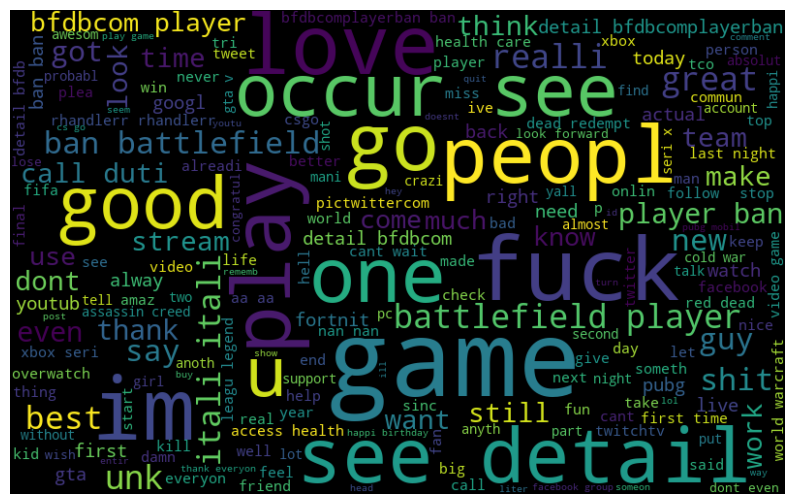

In [39]:
#now i will create a wordcloud which will contain words with positive sentiment
normal_words = ' '.join([text for text in train['cleaned_text'][train['label']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

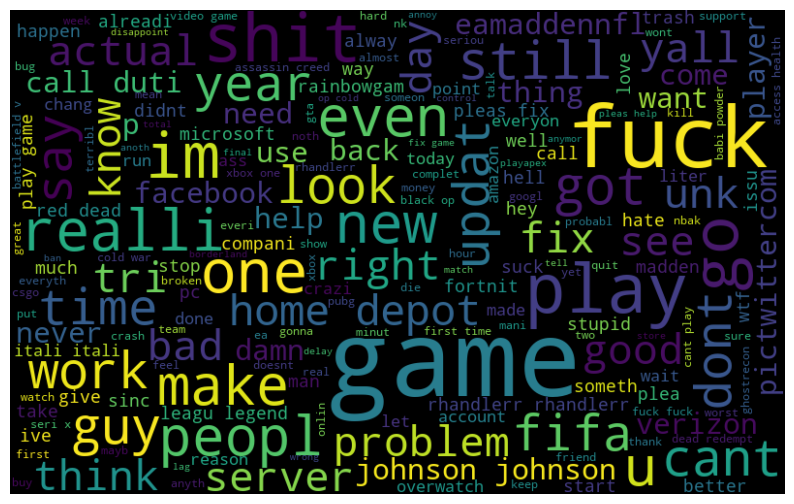

In [44]:
#now same as above but for negative sentiment
negative_words = ' '.join([text for text in train['cleaned_text'][train['label']==1]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### now i will extract some features from the cleaned tweets
